# Tugas Besar IF2220 - Probabilitas dan Statistika
### <font color='#3776ab'>Part 5: Two Samples Hypothesis</font>
Anggota: <br>
13521116 - Juan Christopher Santoso <br>
13521162 - Antonio Natthan Krishna <br>

#### All testing use significant of 5% 

In [31]:
# Import Dataset
df <- read.csv("..\\test\\anggur.csv")

# Data Statistics
properties <- c("Rows", "Columns")
value <- c(nrow(df), ncol(df))
cbind(properties, value)

# List of Columns
columns_index <- c(1:ncol(df))
columns_name <- colnames(df)

# Display List
cbind(columns_index, columns_name)

# Significance
Significance <- 0.05

properties,value
Rows,1000
Columns,12


columns_index,columns_name
1,fixed.acidity
2,volatile.acidity
3,citric.acid
4,residual.sugar
5,chlorides
6,free.sulfur.dioxide
7,total.sulfur.dioxide
8,density
9,pH
10,sulphates


1. Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

T  : 0.02604107 
v  : 998 
t0 low : -1.646382 
t0 high : 1.646382 
P-value: 0.4896149

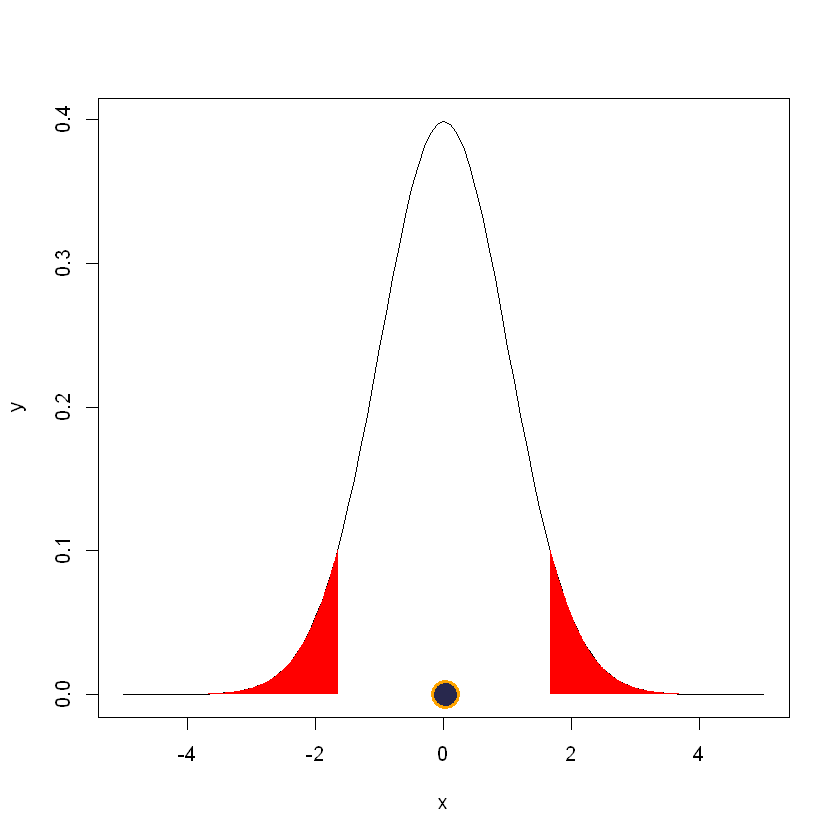

In [32]:
# Divide columns fixed acidity into 2 parts
numrow <- as.numeric(nrow(df)/2)
first_half <- df[1:numrow,]
second_half <- df[numrow+1:numrow,]

# Mean and Standard Deviation each part
first_half_mean <- mean(first_half[,"fixed.acidity"])
second_half_mean <- mean(second_half[,"fixed.acidity"])
first_half_sd <- sd(first_half[,"fixed.acidity"])
second_half_sd <- sd(second_half[,"fixed.acidity"])

T <- (first_half_mean - second_half_mean)/sqrt((first_half_sd^2)/numrow + (second_half_sd^2)/numrow)
v <- round(((first_half_sd^2)/numrow + (second_half_sd^2)/numrow) ^ 2 / ((((first_half_sd^2)/numrow)^2 / (numrow -1)) + (((second_half_sd^2)/numrow)^2 / (numrow -1))))

t0low <- qt(0.05, v) 
t0high <- qt(0.05, v, lower.tail = FALSE) 

cat("T  :", T, "\n")
cat("v  :", v, "\n")
cat("t0 low :", t0low, "\n")
cat("t0 high :", t0high, "\n")
cat("P-value:", pt(T, v, lower.tail = FALSE))

# Plotting Critical Area
x <- seq(-5, 5, 0.1)
y <- dt(x, nrow(df))
plot(x, y, type = "l")

x2 <- seq(-5,t0low,0.01)
y2 <- dt(x2, nrow(df)-1)
x2 = c(-5,x2,t0low)
y2 = c(0,y2,0)
polygon(x2,y2, col="red", border=NA)

x3 <- seq(t0high,5,0.01)
y3 <- dt(x3, nrow(df)-1)
x3 = c(x3,5,t0high)
y3 = c(0,y3,0)
polygon(x3,y3, col="red", border=NA)

lines(T, 0, type = "o", pch=21, bg="#28284d", cex=3, lwd=3, col="orange")

a = mean first half <br>
b = mean second half

H0 = (a == b) <br>
H1 = (a != b) <br>

Use the significance 0.05 <br>
Using t distribution with degree 998, <br>
Critical area : t < t(-0.025), t > t(0.025) <br>
Since t(-0.025) < t < t(0.025) (and p value > significance) which means t is NOT located in critical area. Hence, we accept H0. <br>

Conclusion: mean first half is SAME as mean second half

2. Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?

T  : -0.4673171 
v  : 998 
t0 low : -1.646382 
t0 high : 1.646382 
P-value: 0.6798125

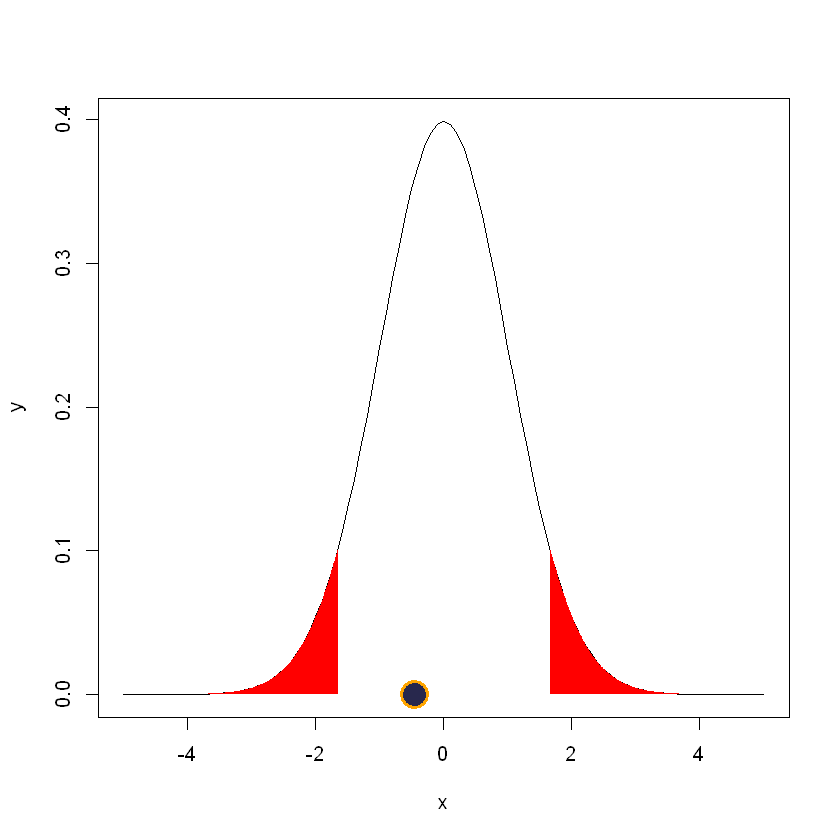

In [33]:
# Divide columns chlorides into 2 parts
numrow <- as.numeric(nrow(df)/2)
first_half <- df[1:numrow,]
second_half <- df[numrow+1:numrow,]

# Mean and Standard Deviation each part
first_half_mean <- mean(first_half[,"chlorides"])
second_half_mean <- mean(second_half[,"chlorides"])
first_half_sd <- sd(first_half[,"chlorides"])
second_half_sd <- sd(second_half[,"chlorides"])

T <- ((first_half_mean - second_half_mean)-0.001) / sqrt((first_half_sd^2)/numrow + (second_half_sd^2)/numrow)
v <- round(((first_half_sd^2)/numrow + (second_half_sd^2)/numrow) ^ 2 / ((((first_half_sd^2)/numrow)^2 / (numrow -1)) + (((second_half_sd^2)/numrow)^2 / (numrow -1))))

t0low <- qt(0.05, v) 
t0high <- qt(0.05, v, lower.tail = FALSE) 

cat("T  :", T, "\n")
cat("v  :", v, "\n")
cat("t0 low :", t0low, "\n")
cat("t0 high :", t0high, "\n")
cat("P-value:", pt(T, v, lower.tail = FALSE))

# Plotting Critical Area
x <- seq(-5, 5, 0.1)
y <- dt(x, nrow(df))
plot(x, y, type = "l")

x2 <- seq(-5,t0low,0.01)
y2 <- dt(x2, nrow(df)-1)
x2 = c(-5,x2,t0low)
y2 = c(0,y2,0)
polygon(x2,y2, col="red", border=NA)

x3 <- seq(t0high,5,0.01)
y3 <- dt(x3, nrow(df)-1)
x3 = c(x3,5,t0high)
y3 = c(0,y3,0)
polygon(x3,y3, col="red", border=NA)

lines(T, 0, type = "o", pch=21, bg="#28284d", cex=3, lwd=3, col="orange")

a = mean first half <br>
b = mean second half

H0 = (a - b == 0.1) <br>
H1 = (a - b != 0.1) <br>

Use the significance 0.05 <br>
Using t distribution with degree 998, <br>
Critical area : t < t(-0.025), t > t(0.025) <br>
Since t(-0.025) < t < t(0.025) (and p value > significance) which means t is NOT located in critical area. Hence, we accept H0. <br>

Conclusion: mean first half is GREATER than mean second half BY 0.001

3. Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates ?


T  : -2.721924 
v  : 48 
t0 low : -1.677224 
t0 high : 1.677224 
P-value: 0.9954912

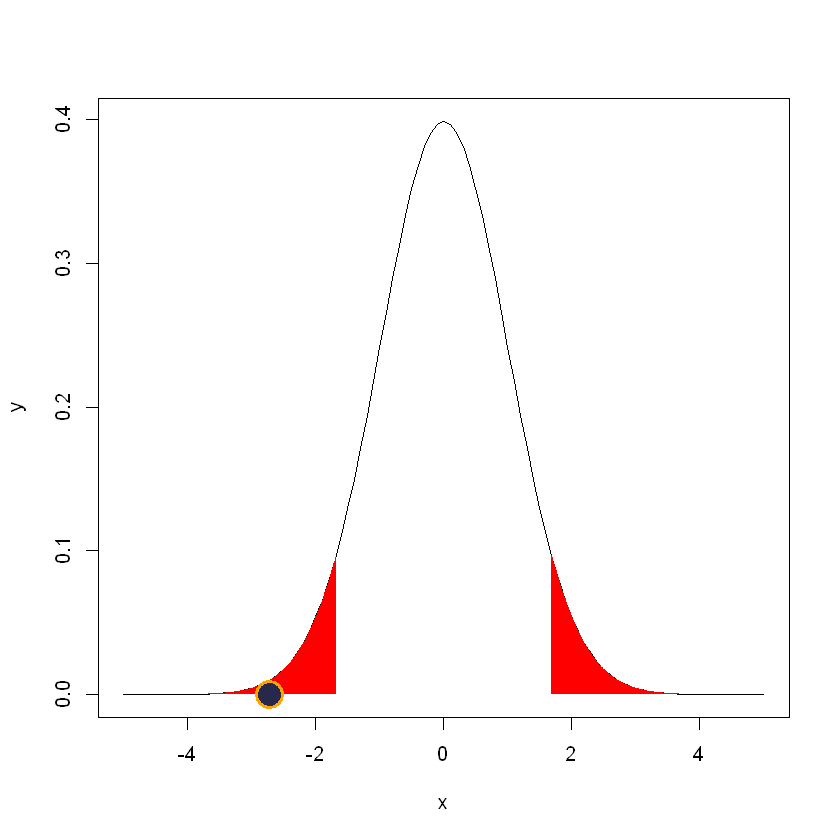

In [34]:
# Divide columns chlorides into 2 parts
numrow <- 25
first_25 <- df[1:25,]

# Mean and Standard Deviation each part
volatile_acidity_mean <- mean(first_half[,"volatile.acidity"])
sulphates_mean <- mean(second_half[,"sulphates"])
volatile_acidity_sd <- sd(first_half[,"volatile.acidity"])
sulphates_sd <- sd(second_half[,"sulphates"])

T <- ((volatile_acidity_mean - sulphates_mean)-0.001) / sqrt((volatile_acidity_sd^2)/numrow + (sulphates_sd^2)/numrow)
v <- round(((volatile_acidity_sd^2)/numrow + (sulphates_sd^2)/numrow) ^ 2 / ((((volatile_acidity_sd^2)/numrow)^2 / (numrow -1)) + (((sulphates_sd^2)/numrow)^2 / (numrow -1))))

t0low <- qt(0.05, v) 
t0high <- qt(0.05, v, lower.tail = FALSE) 

cat("T  :", T, "\n")
cat("v  :", v, "\n")
cat("t0 low :", t0low, "\n")
cat("t0 high :", t0high, "\n")
cat("P-value:", pt(T, v, lower.tail = FALSE))

# Plotting Critical Area
x <- seq(-5, 5, 0.1)
y <- dt(x, nrow(df))
plot(x, y, type = "l")

x2 <- seq(-5,t0low,0.01)
y2 <- dt(x2, nrow(df)-1)
x2 = c(-5,x2,t0low)
y2 = c(0,y2,0)
polygon(x2,y2, col="red", border=NA)

x3 <- seq(t0high,5,0.01)
y3 <- dt(x3, nrow(df)-1)
x3 = c(x3,5,t0high)
y3 = c(0,y3,0)
polygon(x3,y3, col="red", border=NA)

lines(T, 0, type = "o", pch=21, bg="#28284d", cex=3, lwd=3, col="orange")

a = mean first 25 volatile acidity <br>
b = mean first 25 sulphates <br>

H0 = (a == b) <br>
H1 = (a != b) <br>

Use the significance 0.05 <br>
Using t distribution with degree 998, <br>
Critical area : t < t(-0.025), t > t(0.025) <br>
Since t < t(-0.025) (and p value < significance/2) which means t is located in critical area. Hence, we reject H0. <br>

Conclusion: mean first 25 volatile acidity is NOT SAME as mean first 25 sulphates

4. Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?


T  : 0.9420041 
f0 low : 0.8388858 
f0 high : 1.192057 
P-value: 0.2524102

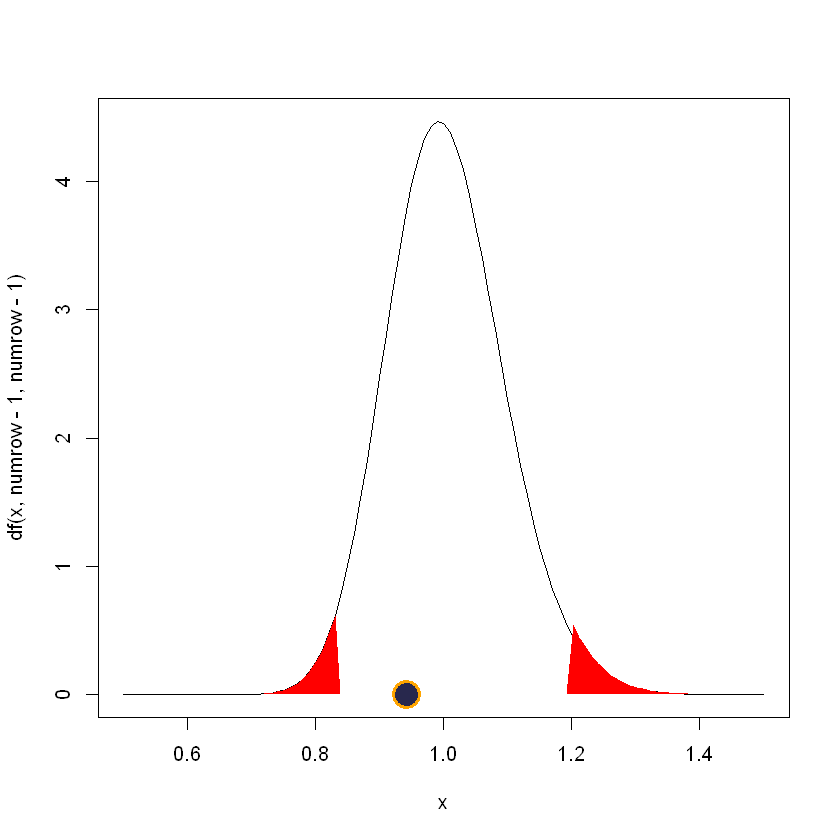

In [35]:
numrow <- as.numeric(nrow(df)/2)
first_half <- df[1:numrow,]
second_half <- df[numrow+1:numrow,]

f <- sd(first_half[,"residual.sugar"])^2 / sd(second_half[,"residual.sugar"])^2
f0low <- qf(0.025, numrow-1, numrow-1) 
f0high <- qf(0.025, numrow-1, numrow-1, lower.tail = FALSE) 

cat("T  :", f, "\n")
cat("f0 low :", f0low, "\n")
cat("f0 high :", f0high, "\n")
cat("P-value:", pf(f, numrow-1, numrow-1))

# Plotting Critical Area
x <- seq(0.5, 2, 0.01)
y <- df(x, numrow-1, numrow-1)
curve(df(x, numrow-1, numrow-1), 0.5, 1.5)

x2 <- seq(0.5,f0low,0.01)
y2 <- df(x2, numrow-1, numrow-1)
x2 = c(0.5,x2,f0low)
y2 = c(0,y2,0)
polygon(x2,y2, col="red", border=NA)

x3 <- seq(f0high,1.5,0.01)
y3 <- df(x3, numrow-1, numrow-1)
x3 = c(x3,1.5,f0high)
y3 = c(0,y3,0)
polygon(x3,y3, col="red", border=NA)

lines(f, 0, type = "o", pch=21, bg="#28284d", cex=3, lwd=3, col="orange")

a = variances first half<br>
b = variances second half<br>

H0 = (a == b) <br>
H1 = (a != b) <br>

Use the significance 0.05 <br>
Using t distribution with degree 499 (first_half) and 499 (second_half) <br>
Critical area : f < f(-0.025), f > f(0.025) <br>
Since f(-0.025) < f < f(-0.025) (and p value > significance/2) which means f is NOT located in critical area. Hence, we accept H0. <br>

Conclusion: variances first half is EQUAL to variances second half

5. Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?


z  : 0 
z0 low : 1.644854 
P-value: 0.5

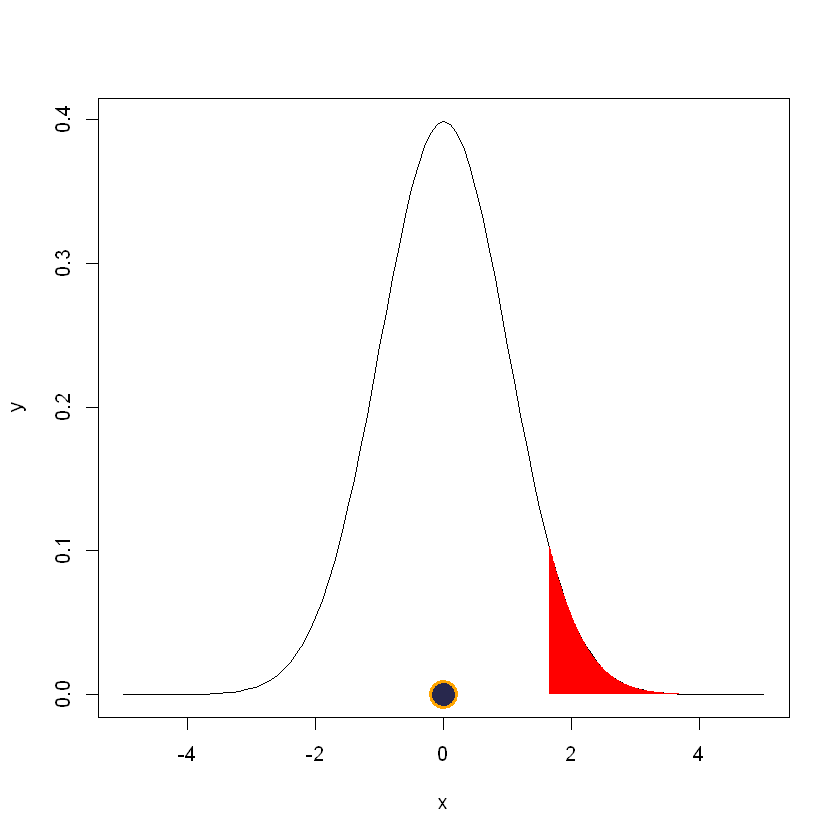

In [36]:
numrow <- as.numeric(nrow(df)/2)
first_half <- df[1:numrow,]
second_half <- df[numrow+1:numrow,]

proportion_first_half <- nrow(first_half[first_half$"alcohol" > 7,]) / numrow
proportion_second_half <- nrow(second_half[second_half$"alcohol" > 7,]) / numrow

z <- (proportion_first_half - proportion_second_half) / sqrt(proportion_first_half*(1-proportion_first_half)/numrow + proportion_second_half*(1-proportion_second_half)/numrow)
z0 <- qnorm(0.05, lower.tail = FALSE) 

cat("z  :", z, "\n")
cat("z0 low :", z0, "\n")
cat("P-value:", 1-pnorm(z))

# Plotting Critical Area
x <- seq(-5, 5, 0.1)
y <- dnorm(x)
plot(x, y, type = "l")

x3 <- seq(z0,5,0.01)
y3 <- dnorm(x3)
x3 = c(x3,5,z0)
y3 = c(0,y3,0)
polygon(x3,y3, col="red", border=NA)

lines(z, 0, type = "o", pch=21, bg="#28284d", cex=3, lwd=3, col="orange")

a = proportion of first half alchohol which greater than 7<br>
b = proportion of second half alcohol which greater than 7<br>

H0 = (a == b) <br>
H1 = (a > b) <br>

Use the significance 0.05 <br>
Critical area : z > z(0.005) <br>
Since z < z(0.005) (and p value > significance) which means z is NOT located in critical area. Hence, we accept H0. <br>

Conclusion: proportion first half alcohol which greater than 7 is NOT GREATER than proportion second half alcohol which greater than 7